In [1]:
import matplotlib.pyplot as plt
import numpy as np
import m6_helpers
from pylbm import lbm

In [13]:
x_dim = 300
y_dim = 300
epochs = 100000
omega = 1.7
top_vel = .1
print("Reynolds number is: {}", lbm.reynolds(x_dim,omega,top_vel))

Reynolds number is: {} 1019.9999999999998


In [14]:
r_xy = lbm.density_init(x_dim=x_dim, y_dim=y_dim, r_mean=1.0, eps=0.0)
u_axy = lbm.local_avg_velocity_init(x_dim=x_dim, y_dim=y_dim, u_mean=0.0, eps=0.0)
f_cxy = lbm.f_eq(u_axy=u_axy, r_xy=r_xy)

velocities = []
print_epoch = 10000
for t in range(epochs):
    if t % print_epoch == 1:
        velocities.append(u_axy)
    f_cxy = lbm.stream(f_cxy=f_cxy)

    f_cxy = lbm.apply_bottom_wall(f_cxy=f_cxy)
    f_cxy = lbm.left_wall(f_cxy=f_cxy)
    f_cxy = lbm.right_wall(f_cxy=f_cxy)
    
    f_cxy = lbm.apply_sliding_top_wall_simple(f_cxy=f_cxy, velocity=top_vel)

    f_cxy, u_axy = lbm.collision(f_cxy=f_cxy, omega=omega)

In [16]:
import pickle
def pickle_save(path: str, obj):
    with open(path, "wb") as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)


def pickle_load(path: str) :
    with open(path, "rb") as handle:
        return pickle.load(handle)

In [17]:
path = "./m6_vel_10000.pickle"
overwrite = False
if overwrite:
    pickle_save(path, velocities)
velocities = pickle_load(path)

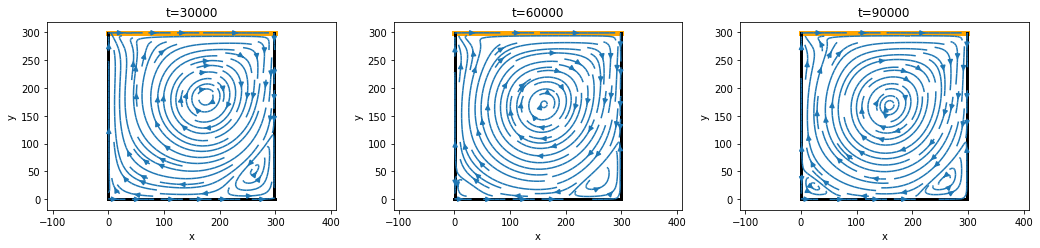

In [18]:
fig = plt.figure(figsize=(30,20))
plt.axis('off')
num_figs = 3
steps = int(len(velocities)/num_figs)
plot_num = 1
for i in range(steps, len(velocities), steps):
    v = velocities[i]
    ax = plt.subplot(5, 5, plot_num)
    # ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 0.5, color="black", linewidth=3.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="orange", linewidth=5.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + 0.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + x_dim - 1.5, np.arange((y_dim)), color="black", linewidth=3.0)
    # ax.set_xticks(np.arange(0, x_dim, x_dim / 10))
    # ax.set_yticks(np.arange(0, y_dim, y_dim / 10))
    # ax.grid(True)
    ax.axis("equal")
    # streamplot is really slow at big grids
    strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), v[0, :, :].T, v[1, :, :].T, cmap="autumn")
    # fig.colorbar(strm.lines)
    ax.set_title("t={}".format(i*print_epoch))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plot_num += 1
    fig.add_axes(ax)
    # plt.show()

plt.show()
plt.close()